In [11]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [38]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None,names=mnames)

# 1.Number of movies, Number of ratings and Number users_who_rated

In [4]:
print("Number of movies are: {0}\nNumber of ratings are: {1}\nNumber of users who rated are: {2}\n".format(len(ratings),len(users),len(users)))

Number of movies are: 1000209
Number of ratings are: 6040
Number of users who rated are: 6040



# 2.5-point summary of the rating attribute

In [5]:
print()
ratings.describe()

,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


# 3.Rating distribution as a histogram

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt

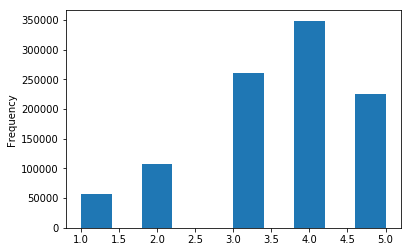

<Figure size 432x288 with 0 Axes>

In [7]:
ratings['rating'].plot.hist()
plt.show()
plt.clf()

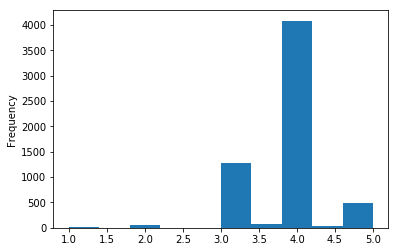

In [27]:
ratings.groupby(['user_id'])['rating'].median().plot(kind = 'hist')

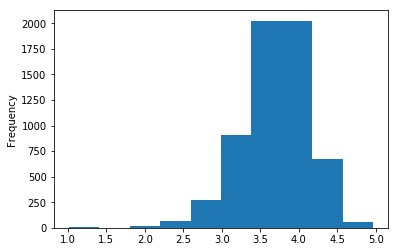

In [28]:
ratings.groupby(['user_id'])['rating'].mean().plot(kind = 'hist')

# 4.Genre distribution as a pie chart

In [30]:
genr=[]
ll=list(movies['genres'])
for genre in ll:
        genr=genr+genre.split('|')
genr=list(set(genr))
newgen=[0]*18
print(genr,end=" ")
print()
print(newgen,end=" ")

['Drama', 'Romance', 'Animation', 'Thriller', 'Mystery', "Children's", 'Film-Noir', 'Sci-Fi', 'Horror', 'Fantasy', 'Musical', 'War', 'Documentary', 'Adventure', 'Comedy', 'Crime', 'Action', 'Western'] 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

In [38]:
i=0
for g in genr:    
    for ges in movies['genres']:    
        if g in ges:
            newgen[i]=newgen[i]+1
    i=i+1

In [42]:
print(newgen,end=" ")

[8011, 471, 105, 492, 106, 251, 44, 276, 343, 68, 114, 143, 127, 283, 1200, 211, 503, 68] 

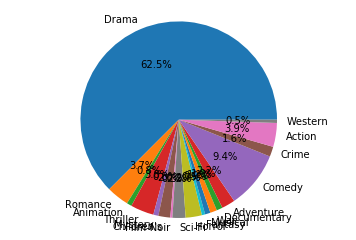

In [48]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = genr
sizes = newgen 
 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()

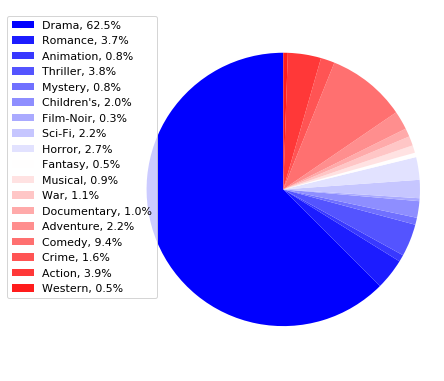

In [50]:
import matplotlib.pyplot as plt

sizes = newgen
labels = genr

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

In [18]:
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [19]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [20]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                                size      mean
title                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [21]:
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                           size mean
title                               
Ulysses (Ulisse) (1954)       1  5.0
Lured (1947)                  1  5.0
Follow the Bitch (1998)       1  5.0
Bittersweet Motel (2000)      1  5.0
Song of Freedom (1936)        1  5.0

# 5.Top ranked movies consider only those movies which have received at-least 100 ratings

In [26]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)

rating          
                                                     size      mean
title                                                              
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         470  4.491489
Raiders of the Lost Ark (1981)                       2514  4.477725
Rear Window (1954)                                   1050  4.476190
Paths of Glory (1957)                                 230  4.473913
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Third Man, The (1949)                                 480  4.452083
Dr. Strangelove or: How I Learned to Stop Worry...   1367  4.449890
Wallace & Gromit: The Best of Aardman Animation...    438  4.426941
To Kill a Mockingbird (1962)                          928  4.425647
Double Indemnity (1944)                               551  4.415608
Casablanca (1942)                                    1669  4.412822
Sixth Sense, The (1999)                              2459  4.406263
Yojimbo (1961)                                        215  4.404651
Lawrence of Arabia (1962)                             831  4.401925
Maltese Falcon, The (1941)                           1043  4.395973
One Flew Over the Cuckoo's Nest (1975)               1725  4.390725
Citizen Kane (1941)                                  1116  4.388889
City Lights (1931)                                    271  4.387454
Bridge on the River Kwai, The (1957)                  938  4.386994
North by Northwest (1959)                            1315  4.384030
Great Escape, The (1963)                              696  4.376437
General, The (1927)                                   206  4.368932
Grand Day Out, A (1992)                               473  4.361522
...                                                   ...       ...
Avengers, The (1998)                                  288  1.996528
Nightmare on Elm Street 5: The Dream Child, A (...    200  1.995000
Friday the 13th Part 3: 3D (1982)                     199  1.979899
Pokémon: The First Movie (1998)                       136  1.977941
Grease 2 (1982)                                       303  1.963696
Robocop 3 (1993)                                      202  1.940594
She-Devil (1989)                                      157  1.936306
Next Karate Kid, The (1994)                           155  1.935484
Problem Child (1990)                                  160  1.925000
Teenage Mutant Ninja Turtles III (1993)               188  1.920213
Police Academy 4: Citizens on Patrol (1987)           174  1.913793
Superman IV: The Quest for Peace (1987)               332  1.888554
Home Alone 3 (1997)                                   154  1.876623
Super Mario Bros. (1993)                              350  1.874286
Spice World (1997)                                    190  1.873684
Speed 2: Cruise Control (1997)                        367  1.871935
Iron Eagle II (1988)                                  148  1.864865
Street Fighter (1994)                                 105  1.857143
Jaws 3-D (1983)                                       210  1.852381
Poltergeist III (1988)                                112  1.830357
Flintstones in Viva Rock Vegas, The (2000)            128  1.804688
Stop! Or My Mom Will Shoot (1992)                     179  1.782123
Exorcist II: The Heretic (1977)                       113  1.769912
Police Academy 5: Assignment: Miami Beach (1988)      150  1.766667
Baby Geniuses (1999)                                  164  1.701220
Police Academy 6: City Under Siege (198

In [39]:
import matplotlib.pyplot as plt

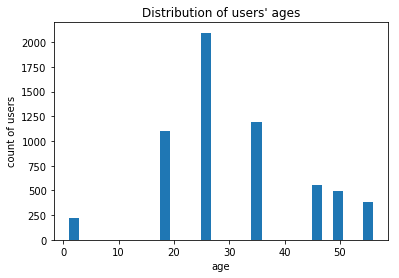

In [40]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [46]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [41]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,1,0-9
53,50,50-59
124,25,20-29
369,35,30-39
770,18,10-19
2778,45,40-49
5001,56,50-59


In [42]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
               size      mean
age_group                    
0-9         27211.0  3.549520
10-19      183536.0  3.507573
20-29      395556.0  3.545235
30-39      199003.0  3.618162
40-49       83633.0  3.638062
50-59      111270.0  3.732677
60-69           NaN       NaN
70-79           NaN       NaN

In [43]:
lens.set_index('movie_id', inplace=True)


In [47]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                         age_group
2001: A Space Odyssey (1968)  0-9          4.150000
                              10-19        3.923404
                              20-29        4.024712
                              30-39        4.080940
                              40-49        4.168478
                              50-59        4.198502
Abyss, The (1989)             0-9          3.909091
                              10-19        3.893939
                              20-29        3.614509
                              30-39        3.686217
                              40-49        3.683099
                              50-59        3.512048
Airplane! (1980)              0-9          3.794872
                              10-19        4.076667
                              20-29        4.002821
Name: rating, dtype: float64

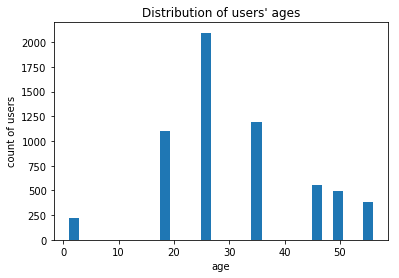

In [48]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [49]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
movie_id,,
1,1,0-9
1,50,50-59
1,25,20-29
1,35,30-39
1,18,10-19
1,45,40-49
1,56,50-59


In [50]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
               size      mean
age_group                    
0-9         27211.0  3.549520
10-19      183536.0  3.507573
20-29      395556.0  3.545235
30-39      199003.0  3.618162
40-49       83633.0  3.638062
50-59      111270.0  3.732677
60-69           NaN       NaN
70-79           NaN       NaN

In [52]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                         age_group
2001: A Space Odyssey (1968)  0-9          4.150000
                              10-19        3.923404
                              20-29        4.024712
                              30-39        4.080940
                              40-49        4.168478
                              50-59        4.198502
Abyss, The (1989)             0-9          3.909091
                              10-19        3.893939
                              20-29        3.614509
                              30-39        3.686217
                              40-49        3.683099
                              50-59        3.512048
Airplane! (1980)              0-9          3.794872
                              10-19        4.076667
                              20-29        4.002821
Name: rating, dtype: float64

In [53]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]


age_group,0-9,10-19,20-29,30-39,40-49,50-59
title,,,,,,
Braveheart (1995),4.192982,4.406250,4.254292,4.152318,4.119048,4.055363
"Bug's Life, A (1998)",3.587500,3.820163,3.954338,3.843931,3.707965,3.771429
E.T. the Extra-Terrestrial (1982),3.653333,3.801527,3.957111,4.004202,4.085427,4.183333
Fargo (1996),4.283019,4.175166,4.235650,4.234694,4.315789,4.413249
Forrest Gump (1994),4.168539,4.100897,4.054678,4.036939,4.187166,4.144444
"Fugitive, The (1993)",4.163265,4.017766,4.119904,4.136000,4.121429,4.113300
Galaxy Quest (1999),3.739130,3.656357,3.764253,3.830380,3.760736,3.888199
Ghostbusters (1984),3.881356,4.020179,3.894490,3.838407,3.966292,3.802752
Gladiator (2000),4.203390,4.231441,4.084291,3.981651,4.132231,4.056818


In [54]:
by_age.rating.mean().unstack(0).fillna(0)

title,2001: A Space Odyssey (1968),"Abyss, The (1989)",Airplane! (1980),Alien (1979),Aliens (1986),American Beauty (1999),Babe (1995),Back to the Future (1985),Being John Malkovich (1999),Blade Runner (1982),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Total Recall (1990),Toy Story (1995),"Usual Suspects, The (1995)",Who Framed Roger Rabbit? (1988),"Wizard of Oz, The (1939)"
age_group,,,,,,,,,,,,,,,,,,,,,
0-9,4.150000,3.909091,3.794872,4.000000,3.970588,4.434783,3.325843,4.014925,4.090909,4.093750,...,4.267327,4.184783,4.130000,4.227273,3.972973,3.441176,3.919643,4.424242,3.888889,4.050847
10-19,3.923404,3.893939,4.076667,3.922078,4.131833,4.521678,3.609929,4.079498,4.202083,4.070632,...,4.427046,4.442142,4.182594,4.058601,3.840617,3.605978,4.017857,4.680798,3.716578,3.868421
20-29,4.024712,3.614509,4.002821,4.252513,4.196382,4.330585,3.957813,3.955045,4.091703,4.350736,...,4.572695,4.390306,4.058201,4.024839,4.192351,3.651054,4.201266,4.552430,3.638607,4.197302
30-39,4.080940,3.686217,3.893805,4.200000,4.133508,4.231156,4.023684,3.975238,4.156171,4.310345,...,4.354633,4.153846,3.887273,4.129771,4.307692,3.737500,4.302600,4.390879,3.685552,4.446384
40-49,4.168478,3.683099,3.931973,4.164894,4.087591,4.151163,4.045161,4.000000,4.141026,4.275862,...,4.386831,4.137168,3.948357,4.056995,4.205128,3.800000,4.104895,4.240385,3.716312,4.429487
50-59,4.198502,3.512048,3.893401,4.097345,3.857143,4.131944,3.956098,3.979798,4.044248,4.208955,...,4.386707,4.065831,3.843333,4.012000,4.232432,3.805405,4.024845,4.371795,3.670051,4.487805
